<a href="https://colab.research.google.com/github/yohanesnuwara/numerical-method/blob/master/euler_proof.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

import scipy.special

# Taylor Series of $e^x$

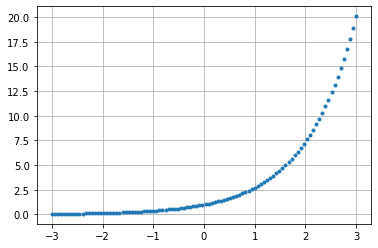

In [116]:
x = np.linspace(-3, 3, 100)
y_exp = np.exp(x)

plt.plot(x, y_exp, '.')
plt.grid(True)

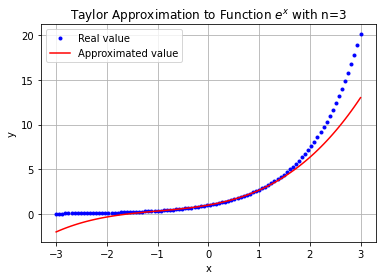

In [118]:
n = 3 # adjust
x = np.linspace(-3, 3, 100)

ys = []
for j in range(len(x)):
  yn = []
  for i in range(0,n+1):
    y = (x[j]**i) / scipy.special.factorial(i)
    yn.append(float(y))
  ysum = np.sum(yn)
  ys.append(float(ysum))

p1 = plt.plot(x, y_exp, '.', color='blue')
p2 = plt.plot(x, ys, color='red')
plt.title('Taylor Approximation to Function $e^x$ with n={}'.format(n))
plt.legend((p1[0], p2[0]), (['Real value', 'Approximated value']))
plt.xlabel('x'); plt.ylabel('y')
plt.grid(True)

# Bernoulli Numbers


In [128]:
from fractions import Fraction as Fr

count = 20 # how many bernoulli numbers will be created

def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range(count+1)]
# bn = [(i, b) for i,b in bn if b] # filter the odd sequence
width = max(len(str(b.numerator)) for i,b in bn)
print('Bernoulli numbers until n={}'.format(count))
for i,b in bn:
    print('B(%2i) = %*i/%i' % (i, width, b.numerator, b.denominator))

Bernoulli numbers until n=20
B( 0) =       1/1
B( 1) =       1/2
B( 2) =       1/6
B( 3) =       0/1
B( 4) =      -1/30
B( 5) =       0/1
B( 6) =       1/42
B( 7) =       0/1
B( 8) =      -1/30
B( 9) =       0/1
B(10) =       5/66
B(11) =       0/1
B(12) =    -691/2730
B(13) =       0/1
B(14) =       7/6
B(15) =       0/1
B(16) =   -3617/510
B(17) =       0/1
B(18) =   43867/798
B(19) =       0/1
B(20) = -174611/330


In [91]:
# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  print('B({}) = {}'.format(j, bernoulli))
  b2n.append(float(bernoulli))

# output: b2n

B(0) = 1.0
B(1) = 0.5
B(2) = 0.16666666666666666
B(3) = 0.0
B(4) = -0.03333333333333333
B(5) = 0.0
B(6) = 0.023809523809523808
B(7) = 0.0
B(8) = -0.03333333333333333
B(9) = 0.0
B(10) = 0.07575757575757576
B(11) = 0.0
B(12) = -0.2531135531135531
B(13) = 0.0
B(14) = 1.1666666666666667
B(15) = 0.0
B(16) = -7.092156862745098
B(17) = 0.0
B(18) = 54.971177944862156
B(19) = 0.0
B(20) = -529.1242424242424
B(21) = 0.0


# Tangent Function

Bernoulli numbers are applied to compute tangent function approximated using Taylor series

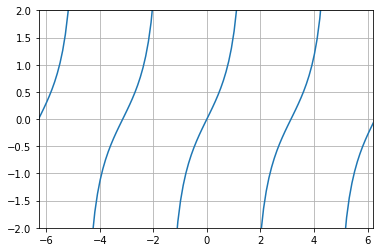

In [119]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
y = np.tan(x)

# Insert a NaN where the difference between successive points is negative
y[:-1][np.diff(y) < 0] = np.nan

plt.plot(x, y)
plt.xlim(min(x), max(x)); plt.ylim(-2,2)
plt.grid(True)

In [157]:
# x = np.arange(-2*np.pi, 2*np.pi, 0.1)
x = np.deg2rad(45)
count = 20

# compute bernoulli numbers
def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range(count+1)]

# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  b2n.append(float(bernoulli))

# compute tangent approximation
series = []
for n in range(1, count+1):
  a = (-1)**(n+1)
  numerator = (2**(2*n)) * ((2**(2*n)) - 1)
  denominator = scipy.special.factorial(2*n)
  bernoulli = b2n[n]
  serie = a * (numerator / denominator) * bernoulli * (x**(2 * n - 1))
  series.append(float(serie))

tangent = np.sum(series)

21


In [163]:
x = np.arange(-2*np.pi, 2*np.pi, 0.1)
# x = np.deg2rad(45)
count = 20

# compute bernoulli numbers
def bernoulli(n):
    A = [0] * (n+1)
    for m in range(n+1):
        A[m] = Fr(1, m+1)
        for j in range(m, 0, -1):
          A[j-1] = j*(A[j-1] - A[j])
    return A[0] # (which is Bn)
 
bn = [(i, bernoulli(i)) for i in range(count+1)]

# convert fractions to decimal
b2n = []
for j in range(len(bn)):
  bernoulli = np.float64(bn[j][1])
  b2n.append(float(bernoulli))

# # compute tangent approximation
# series = []
# for n in range(1, count+1):
#   a = (-1)**(n+1)
#   numerator = (2**(2*n)) * ((2**(2*n)) - 1)
#   denominator = scipy.special.factorial(2*n)
#   bernoulli = b2n[n]
#   serie = a * (numerator / denominator) * bernoulli * (x**(2 * n - 1))
#   series.append(float(serie))

# tangent = np.sum(series)

ys = []
for j in range(len(x)):
  # compute tangent approximation
  series = []
  for n in range(1, count+1):
    a = (-1)**(n+1)
    numerator = (2**(2*n)) * ((2**(2*n)) - 1)
    denominator = scipy.special.factorial(2*n)
    bernoulli = b2n[n]
    serie = a * (numerator / denominator) * bernoulli * (x[n]**(2 * n - 1))
    series.append(float(serie))
  tangent = np.sum(series)
  # ys.append(float(tangent))
  print(tangent)

ys

1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257416351
1970.5792257

[]

In [139]:
np.tan(np.deg2rad(45))

0.9999999999999999

# ***

In [9]:
B0 = 1
n = 1
k = 0
binomial_nk = (scipy.special.factorial(n)) / (scipy.special.factorial(k)) * (scipy.special.factorial(n - k))
numerator = n - k + 1

B1 = B0 - binomial_nk * (B0 / 2)
B1

0.5

In [18]:
n = 3
k = np.arange(0, n, 1)

Bmin = np.array([1, 0.5, (1/6)])
for i in range(n):
  binomial_nk = (scipy.special.factorial(n)) / (scipy.special.factorial(i)) * (scipy.special.factorial(n - i))
  denominator = n - k[i] + 1
  serie = binomial_nk * (Bmin[i] / denominator)
  print(binomial_nk) 

36.0
12.0
3.0


In [14]:
p = [1,2,3]

for j in range(len(p)):
  print(j)

0
1
2


In [0]:
n = 1
k = np.arange(0, n, 1)

Bmin = []

for i in range(n):
  Bmin = 1 # bernoulli number for n=0
  binomial_nk = (scipy.special.factorial(n)) / (scipy.special.factorial(i)) * (scipy.special.factorial(n - i))
  numerator = n - k + 1
  bernoulli = Bmin - binomial_nk * (Bmin / 2)
  Bmin = bernoulli
  print(bernoulli)

0.5


In [0]:
a = 1

for i in range(a):
  print(i)

0


In [0]:
B2n = np.array([])